<a href="https://colab.research.google.com/github/YagyanshB/SemEval-Task6-CS408/blob/main/Data_Splitting_And_Exploratory_Analysis_OLID_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# We mount our Google Drive within Google Colab. Since I have already uploaded my files on my Google Drive
# this task becomes fairly convenient for myself. If running the program, please be sure to mount the 
# dataset on your google drive as well. 

from google.colab import drive
drive.mount('/content/drive')

train_file = 'drive/My Drive/olid-training-v1.0.tsv'

test_file_a = 'drive/My Drive/testset-levela.tsv' 
test_labels_a = 'drive/My Drive/labels-levela.csv' 

test_labels_b = 'drive/My Drive/labels-levelb.csv' 
test_file_b = 'drive/My Drive/testset-levelb.tsv' 

test_file_c = 'drive/My Drive/testset-levelc.tsv' 
test_labels_c = 'drive/My Drive/labels-levelc.csv' 

# Within the Code below, we re run the code to ensure that our files have been
# mounted in the right manner. It is imperative to have the link to the directory
# sent correctly; else the files won't be loaded.

Mounted at /content/drive


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import re
import matplotlib.pyplot as plt
import missingno as ms
% matplotlib inline

import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [104]:
training_data = pd.read_csv('drive/My Drive/olid-training-v1.0.csv') #to read and store in panda dataframe
testing_data_a = pd.read_csv('drive/My Drive/testset-levela.csv') #to read and store in panda dataframe
testing_data_b = pd.read_csv('drive/My Drive/testset-levelb.csv') #to read and store in panda dataframe
testing_data_c = pd.read_csv('drive/My Drive/testset-levelc.csv') #to read and store in panda dataframe


In [105]:
training_data.shape, testing_data_a.shape #to print number of rows and columns

((13240, 5), (860, 2))

In [106]:
training_data.shape, testing_data_b.shape #to print number of rows and columns

((13240, 5), (240, 2))

In [107]:
training_data.shape, testing_data_c.shape #to print number of rows and columns

((13240, 5), (213, 2))

In [109]:
training_data.head(10) #to print top 10 tweets from training data

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you‚Äôre drunk!!! @USER #M...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN
5,97670,@USER Liberals are all Kookoo !!!,OFF,TIN,OTH
6,77444,@USER @USER Oh noes! Tough shit.,OFF,UNT,NaN
7,52415,@USER was literally just talking about this lo...,OFF,TIN,GRP
8,45157,@USER Buy more icecream!!!,NOT,NaN,NaN
9,13384,@USER Canada doesn‚Äôt need another CUCK! We a...,OFF,TIN,IND


In [110]:
training_data.info() #complete info of the training data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13240 entries, 0 to 13239
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         13240 non-null  int64 
 1   tweet      13240 non-null  object
 2   subtask_a  13240 non-null  object
 3   subtask_b  4400 non-null   object
 4   subtask_c  3876 non-null   object
dtypes: int64(1), object(4)
memory usage: 517.3+ KB


In [112]:
training_data['subtask_a'].value_counts() #count number of  positive and negative  tweet for Subtask A

NOT    8840
OFF    4400
Name: subtask_a, dtype: int64

In [113]:
training_data['subtask_b'].value_counts() #count number of  targeted and untargeted tweets for Subtask B

TIN    3876
UNT     524
Name: subtask_b, dtype: int64

In [114]:
training_data['subtask_c'].value_counts() #count number of  tweets targeted Individually, towards a Group or Other for Subtask C

IND    2407
GRP    1074
OTH     395
Name: subtask_c, dtype: int64

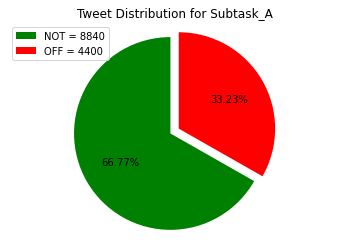

In [115]:
import matplotlib.pyplot as plt

lines = 'NOT = 8840', 'OFF = 4400'
sections = [8840, 4400]
colors = ['g', 'r']

plt.pie(sections, colors=colors,
        startangle=90,
        explode = (0,0.1),
        autopct = '%1.2f%%')
plt.axis('equal') # Try commenting this out.
plt.title('Tweet Distribution for Subtask_A')
plt.legend(lines)
plt.show()

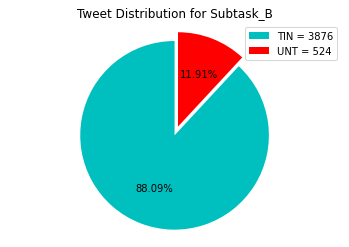

In [116]:
import matplotlib.pyplot as plt

lines = 'TIN = 3876', 'UNT = 524'
sections = [3876, 524]
colors = ['c', 'r']

plt.pie(sections, colors=colors,
        startangle=90,
        explode = (0,0.1),
        autopct = '%1.2f%%')
plt.axis('equal') # Try commenting this out.
plt.title('Tweet Distribution for Subtask_B')
plt.legend(lines)
plt.show()

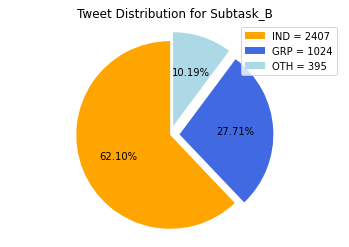

In [117]:
import matplotlib.pyplot as plt

lines = 'IND = 2407', 'GRP = 1024', 'OTH = 395'
sections = [2407, 1074, 395]
colors = ['orange', 'royalblue', 'lightblue']

plt.pie(sections, colors=colors,
        startangle=90,
        explode = (0,0.1,0.1),
        autopct = '%1.2f%%')
plt.axis('equal') # Try commenting this out.
plt.title('Tweet Distribution for Subtask_B')
plt.legend(lines)
plt.show()